In [1]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip -P data
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip -P data

--2021-04-30 17:22:40--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘data/GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  28.0MB/s    in 10s     

2021-04-30 17:22:50 (25.5 MB/s) - ‘data/GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]

--2021-04-30 17:22:51--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88978620 (85M) [application/zip]
Saving to: ‘data/GTSRB_Final_Test_Images.zip’

GTSRB_Final_Test_Im 100%[============

In [2]:
! unzip data/GTSRB_Final_Training_Images.zip -d data
! unzip data/GTSRB_Final_Test_Images.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/GTSRB/Final_Test/Images/07632.ppm  
  inflating: data/GTSRB/Final_Test/Images/07633.ppm  
  inflating: data/GTSRB/Final_Test/Images/07634.ppm  
  inflating: data/GTSRB/Final_Test/Images/07635.ppm  
  inflating: data/GTSRB/Final_Test/Images/07636.ppm  
  inflating: data/GTSRB/Final_Test/Images/07637.ppm  
  inflating: data/GTSRB/Final_Test/Images/07638.ppm  
  inflating: data/GTSRB/Final_Test/Images/07639.ppm  
  inflating: data/GTSRB/Final_Test/Images/07640.ppm  
  inflating: data/GTSRB/Final_Test/Images/07641.ppm  
  inflating: data/GTSRB/Final_Test/Images/07642.ppm  
  inflating: data/GTSRB/Final_Test/Images/07643.ppm  
  inflating: data/GTSRB/Final_Test/Images/07644.ppm  
  inflating: data/GTSRB/Final_Test/Images/07645.ppm  
  inflating: data/GTSRB/Final_Test/Images/07646.ppm  
  inflating: data/GTSRB/Final_Test/Images/07647.ppm  
  inflating: data/GTSRB/Final_Test/Images/07648.ppm  
  inflating: data/GTSRB/Final_T

In [3]:
!ls data/GTSRB/Final_Test/Images

00000.ppm  02106.ppm  04212.ppm  06318.ppm  08424.ppm  10530.ppm
00001.ppm  02107.ppm  04213.ppm  06319.ppm  08425.ppm  10531.ppm
00002.ppm  02108.ppm  04214.ppm  06320.ppm  08426.ppm  10532.ppm
00003.ppm  02109.ppm  04215.ppm  06321.ppm  08427.ppm  10533.ppm
00004.ppm  02110.ppm  04216.ppm  06322.ppm  08428.ppm  10534.ppm
00005.ppm  02111.ppm  04217.ppm  06323.ppm  08429.ppm  10535.ppm
00006.ppm  02112.ppm  04218.ppm  06324.ppm  08430.ppm  10536.ppm
00007.ppm  02113.ppm  04219.ppm  06325.ppm  08431.ppm  10537.ppm
00008.ppm  02114.ppm  04220.ppm  06326.ppm  08432.ppm  10538.ppm
00009.ppm  02115.ppm  04221.ppm  06327.ppm  08433.ppm  10539.ppm
00010.ppm  02116.ppm  04222.ppm  06328.ppm  08434.ppm  10540.ppm
00011.ppm  02117.ppm  04223.ppm  06329.ppm  08435.ppm  10541.ppm
00012.ppm  02118.ppm  04224.ppm  06330.ppm  08436.ppm  10542.ppm
00013.ppm  02119.ppm  04225.ppm  06331.ppm  08437.ppm  10543.ppm
00014.ppm  02120.ppm  04226.ppm  06332.ppm  08438.ppm  10544.ppm
00015.ppm  02121.ppm  042

In [4]:
# Download class names
! wget https://raw.githubusercontent.com/georgesung/traffic_sign_classification_german/master/signnames.csv -P data

--2021-04-30 17:23:14--  https://raw.githubusercontent.com/georgesung/traffic_sign_classification_german/master/signnames.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 999 [text/plain]
Saving to: ‘data/signnames.csv’

signnames.csv       100%[===================>]     999  --.-KB/s    in 0s      

2021-04-30 17:23:14 (42.4 MB/s) - ‘data/signnames.csv’ saved [999/999]



In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.shape[0], -1)    


model_cnn = nn.Sequential(nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(),
                          nn.Conv2d(32, 32, 3, padding=1, stride=2), nn.ReLU(),
                          nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
                          nn.Conv2d(64, 64, 3, padding=1, stride=2), nn.ReLU(),
                          nn.Flatten(),
                          nn.Linear(4096, 100), nn.ReLU(),
                          nn.Linear(100, 44)).to(device)

data_transforms = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    ])

train_data_path = "data/GTSRB/Final_Training/Images"
test_data_path = "data/GTSRB/Final_Test"

train_data = datasets.ImageFolder(root = train_data_path,transform = data_transforms)
test_data = datasets.ImageFolder(root = test_data_path, transform = data_transforms)

train_loader = DataLoader(train_data, batch_size = 100, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 100, shuffle=False)

print(test_loader)



def epoch(loader, model, opt=None):
    total_loss, total_err = 0.,0.
    i=0
    for X,y in loader:
        X,y = X.to(device), y.to(device)
        yp = model(X)
        
        if i%1000==0:
          print(X,y)
        i= i+1

        loss = nn.CrossEntropyLoss()(yp,y)
        if opt:
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        total_err += (yp.max(dim=1)[1] != y).sum().item()
        total_loss += loss.item() * X.shape[0]   
    return total_err / len(loader.dataset), total_loss / len(loader.dataset)

opt = optim.SGD(model_cnn.parameters(), lr=1e-2)

for t in range(10):
    train_err, train_loss = epoch(train_loader, model_cnn, opt)
    test_err, test_loss = epoch(test_loader, model_cnn)
    if t == 4:
        for param_group in opt.param_groups:
            param_group["lr"] = 1e-3
    print(*("{:.6f}".format(i) for i in (train_err, train_loss, test_err, test_loss)), sep="\t")


tensor([[[[0.3098, 0.3333, 0.2980,  ..., 0.3529, 0.3451, 0.3294],
          [0.3216, 0.3255, 0.2902,  ..., 0.3333, 0.2941, 0.2824],
          [0.3216, 0.3255, 0.2941,  ..., 0.3059, 0.2706, 0.2706],
          ...,
          [0.2353, 0.2392, 0.2392,  ..., 0.3490, 0.3255, 0.3059],
          [0.2196, 0.2235, 0.2314,  ..., 0.3098, 0.2784, 0.2824],
          [0.2157, 0.2235, 0.2275,  ..., 0.3020, 0.2941, 0.3059]],

         [[0.2745, 0.2863, 0.2392,  ..., 0.3098, 0.3098, 0.2980],
          [0.2667, 0.2706, 0.2353,  ..., 0.2902, 0.2549, 0.2431],
          [0.2667, 0.2745, 0.2392,  ..., 0.2549, 0.2118, 0.2157],
          ...,
          [0.1804, 0.1843, 0.1882,  ..., 0.3098, 0.2784, 0.2588],
          [0.1647, 0.1686, 0.1725,  ..., 0.2510, 0.2275, 0.2275],
          [0.1647, 0.1647, 0.1686,  ..., 0.2392, 0.2353, 0.2431]],

         [[0.3137, 0.3255, 0.2549,  ..., 0.3686, 0.3725, 0.3647],
          [0.3059, 0.3137, 0.2549,  ..., 0.3333, 0.3098, 0.3137],
          [0.2980, 0.3059, 0.2627,  ..., 0

In [6]:
i=0
for y in train_loader:
    if i%1000==0:
      print(y)
    i= i+1


[tensor([[[[0.4706, 0.7922, 0.9647,  ..., 0.2863, 0.2902, 0.2667],
          [0.5765, 0.7490, 0.9059,  ..., 0.2941, 0.2980, 0.3059],
          [0.8118, 0.7216, 0.7176,  ..., 0.3529, 0.3137, 0.3686],
          ...,
          [0.2902, 0.2824, 0.2784,  ..., 0.3922, 0.3647, 0.3373],
          [0.2471, 0.2353, 0.2353,  ..., 0.4706, 0.4000, 0.3608],
          [0.3020, 0.2667, 0.2275,  ..., 0.5686, 0.4706, 0.3843]],

         [[0.4196, 0.5216, 0.4588,  ..., 0.2627, 0.2667, 0.2353],
          [0.3451, 0.4314, 0.4980,  ..., 0.2902, 0.2745, 0.2627],
          [0.3882, 0.3569, 0.4078,  ..., 0.3686, 0.2902, 0.3059],
          ...,
          [0.3020, 0.2902, 0.2824,  ..., 0.3098, 0.2784, 0.2431],
          [0.2392, 0.2275, 0.2196,  ..., 0.3843, 0.3020, 0.2588],
          [0.2118, 0.2000, 0.1922,  ..., 0.4588, 0.3608, 0.2745]],

         [[0.2863, 0.3647, 0.3333,  ..., 0.1608, 0.1725, 0.1608],
          [0.1804, 0.2431, 0.3647,  ..., 0.1765, 0.1647, 0.1882],
          [0.2510, 0.2039, 0.2863,  ..., 

In [7]:
import glob
import numpy as np
!pip install opencv-python
import cv2
from skimage.color import rgb2gray
from skimage import data

NUM_CLASSES = 43
images = []
image_labels = []

train_data_path2 = train_data_path = "data/GTSRB/Final_Training/Images"

# get the image paths

for i in range(NUM_CLASSES):
    image_path = train_data_path + '/' + format(i, '05d') + '/'
    for img in glob.glob(image_path + '*.ppm'):        
        image = cv2.imread(img)
        image = rgb2gray(image)
        image = (image / 255.0) # rescale
        image = cv2.resize(image, (32, 32)) #resize
        images.append(image)
        # create the image labels and one-hot encode them
        labels = np.zeros((NUM_CLASSES, ), dtype=np.float32)
        labels[i] = 1.0
        image_labels.append(labels)

print(image_labels)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
torch.save(model_cnn.state_dict(), "model_cnn.pt")

In [9]:
model_cnn.load_state_dict(torch.load("model_cnn.pt"))

<All keys matched successfully>

# Fast Gradient Sign Method (FGSM)

In [10]:
def fgsm(model, X, y, epsilon):
    """ Construct FGSM adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    loss = nn.CrossEntropyLoss()(model(X + delta), y)
    loss.backward()
    return epsilon * delta.grad.detach().sign()

In [11]:
import matplotlib.pyplot as plt

for X,y in test_loader:
    X,y = X.to(device), y.to(device)
    break
    
def plot_images(X,y,yp,M,N):
    f,ax = plt.subplots(M,N, sharex=True, sharey=True, figsize=(N,M*1.3))
    for i in range(M):
        for j in range(N):
            ax[i][j].imshow(1-X[i*N+j][0].cpu().numpy(), cmap="gray")
            title = ax[i][j].set_title("Pred: {}".format(yp[i*N+j].max(dim=0)[1]))
            plt.setp(title, color=('g' if yp[i*N+j].max(dim=0)[1] == y[i*N+j] else 'r'))
            ax[i][j].set_axis_off()
    plt.tight_layout()

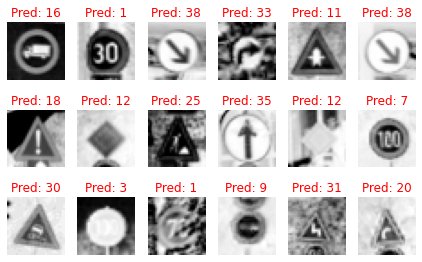

In [12]:
### Illustrate original predictions
yp = model_cnn(X)
plot_images(X, y, yp, 3, 6)

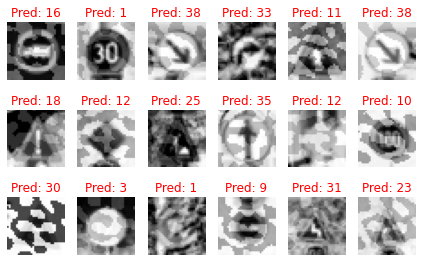

In [13]:
delta = fgsm(model_cnn, X, y, 0.1)
yp = model_cnn(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [14]:
def epoch_adversarial(model, loader, attack, *args):
    total_loss, total_err = 0.,0.
    for X,y in loader:
        X,y = X.to(device), y.to(device)
        delta = attack(model, X, y, *args)
        yp = model(X+delta)
        loss = nn.CrossEntropyLoss()(yp,y)
        
        total_err += (yp.max(dim=1)[1] != y).sum().item()
        total_loss += loss.item() * X.shape[0]
    return total_err / len(loader.dataset), total_loss / len(loader.dataset)

In [15]:
print("CNN:", epoch_adversarial(model_cnn, test_loader, fgsm, 0.1)[0])

CNN: 1.0


# Projected Gradient Descent (PGD)
##PGD_linf

In [16]:
def pgd_linf(model, X, y, epsilon, alpha, num_iter):
    """ Construct FGSM adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        loss = nn.CrossEntropyLoss()(model(X + delta), y)
        loss.backward()
        delta.data = (delta + alpha*delta.grad.detach().sign()).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

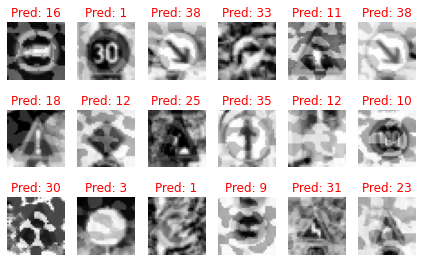

In [17]:
### Illustrate attacked images
delta = pgd_linf(model_cnn, X, y, epsilon=0.1, alpha=1e-2, num_iter=40)
yp = model_cnn(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [18]:
print("CNN:", epoch_adversarial(model_cnn, test_loader, pgd_linf, 0.1, 1e-2, 40)[0])

CNN: 1.0


##pgd_linf_targ

In [19]:
def pgd_linf_targ(model, X, y, epsilon, alpha, num_iter, y_targ):
    """ Construct targeted adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        yp = model(X + delta)
        loss = (yp[:,y_targ] - yp.gather(1,y[:,None])[:,0]).sum()
        loss.backward()
        delta.data = (delta + alpha*delta.grad.detach().sign()).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

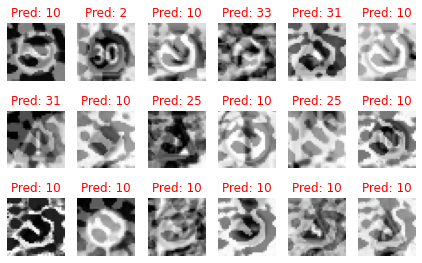

In [20]:
delta = pgd_linf_targ(model_cnn, X, y, epsilon=0.2, alpha=1e-2, num_iter=40, y_targ=2)
yp = model_cnn(X + delta)
plot_images(X+delta, y, yp, 3, 6)

## pgd_linf_targ2

In [21]:
def pgd_linf_targ2(model, X, y, epsilon, alpha, num_iter, y_targ):
    """ Construct targeted adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        yp = model(X + delta)
        loss = 2*yp[:,y_targ].sum() - yp.sum()
        loss.backward()
        delta.data = (delta + alpha*delta.grad.detach().sign()).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

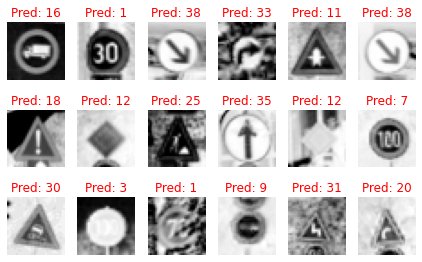

In [22]:
delta = pgd_linf_targ(model_cnn, X, y, epsilon=0.2, alpha=1e-2, num_iter=40, y_targ=0)
yp = model_cnn(X + delta)
plot_images(X+delta, y, yp, 3, 6)